## Week 4 Time Series & Linear Regression

4.1 Time Series

In [1]:
import pandas as pd
import numpy as np

#Now lets generate some random normal datapoints
a = np.random.standard_normal((9, 4))
#Now lets place "a" into Pandas DataFrames and name our columns
df = pd.DataFrame(a)
df.columns = ['No1', 'No2', 'No3', 'No4']
#Add some dates into the DataFrame index
dates = pd.date_range('2020-1-1', periods=9, freq='M')
df.index = dates
print(df)


                 No1       No2       No3       No4
2020-01-31  0.179698 -0.761152  0.053412 -0.328371
2020-02-29 -0.052109 -0.986474 -0.102042 -0.520573
2020-03-31 -0.575847  1.254587 -1.086191  1.175812
2020-04-30 -1.907336  0.474498 -2.299262  0.090251
2020-05-31  1.087437  0.695148 -1.435261  1.877410
2020-06-30  1.356598  1.793272 -0.776821  0.980273
2020-07-31 -1.265299 -1.072867 -1.462322  0.336904
2020-08-31 -1.314206 -2.178909  1.588026 -0.351232
2020-09-30  0.757586  0.366485 -0.621066 -1.759160


In [2]:
df.head()

,No1,No2,No3,No4
2020-01-31,0.179698,-0.761152,0.053412,-0.328371
2020-02-29,-0.052109,-0.986474,-0.102042,-0.520573
2020-03-31,-0.575847,1.254587,-1.086191,1.175812
2020-04-30,-1.907336,0.474498,-2.299262,0.090251
2020-05-31,1.087437,0.695148,-1.435261,1.877410


In [3]:

import pandas as pd
import numpy as np
#DATA GENERATION BLOCK
a = np.random.standard_normal((50, 4))
df = pd.DataFrame(a)
df.columns = ['No1', 'No2', 'No3', 'No4']

# 生成一列随机日期
df['dates'] = pd.date_range('2020-1-1', periods=50, freq='W')



In [4]:
df

,No1,No2,No3,No4,dates
0,-0.438367,0.397661,1.251817,-1.093516,2020-01-05
1,-0.053344,0.139217,-0.183789,0.543098,2020-01-12
2,0.718571,0.491017,0.090863,-0.270744,2020-01-19
3,-0.053668,-0.122840,-0.507094,-0.161061,2020-01-26
4,0.195319,0.179898,0.510797,-0.801821,2020-02-02
5,0.594159,0.651376,0.100343,0.107634,2020-02-09
6,-0.537792,1.299187,-0.900995,2.057407,2020-02-16
7,-3.056037,-0.286496,0.161232,-0.081570,2020-02-23
8,0.926894,-0.464747,0.027735,-0.759207,2020-03-01
9,-0.361455,0.288027,0.842556,0.353760,2020-03-08


In [5]:
# 将index设定为日期 基础的time series方式
df.index = df.dates

In [6]:
df

,No1,No2,No3,No4,dates
dates,,,,,
2020-01-05,-0.438367,0.397661,1.251817,-1.093516,2020-01-05
2020-01-12,-0.053344,0.139217,-0.183789,0.543098,2020-01-12
2020-01-19,0.718571,0.491017,0.090863,-0.270744,2020-01-19
2020-01-26,-0.053668,-0.122840,-0.507094,-0.161061,2020-01-26
2020-02-02,0.195319,0.179898,0.510797,-0.801821,2020-02-02
2020-02-09,0.594159,0.651376,0.100343,0.107634,2020-02-09
2020-02-16,-0.537792,1.299187,-0.900995,2.057407,2020-02-16
2020-02-23,-3.056037,-0.286496,0.161232,-0.081570,2020-02-23
2020-03-01,0.926894,-0.464747,0.027735,-0.759207,2020-03-01


In [7]:
# Drop掉dates这一列 基础Data Cleaning
df.drop(columns=['dates'])

,No1,No2,No3,No4
dates,,,,
2020-01-05,-0.438367,0.397661,1.251817,-1.093516
2020-01-12,-0.053344,0.139217,-0.183789,0.543098
2020-01-19,0.718571,0.491017,0.090863,-0.270744
2020-01-26,-0.053668,-0.122840,-0.507094,-0.161061
2020-02-02,0.195319,0.179898,0.510797,-0.801821
2020-02-09,0.594159,0.651376,0.100343,0.107634
2020-02-16,-0.537792,1.299187,-0.900995,2.057407
2020-02-23,-3.056037,-0.286496,0.161232,-0.081570
2020-03-01,0.926894,-0.464747,0.027735,-0.759207


In [8]:
#每一列的和
df.sum()

No1    -1.226450
No2     1.975051
No3   -11.284989
No4    -1.648214
dtype: float64

In [9]:
#每一列平均值
df.mean()

<ipython-input-9-7ed201b6234e>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.mean()


No1   -0.024529
No2    0.039501
No3   -0.225700
No4   -0.032964
dtype: float64

In [10]:
# 累计值
df.cumsum()

,No1,No2,No3,No4,dates
dates,,,,,
2020-01-05,-0.438367,0.397661,1.251817,-1.093516,2020-01-05 00:00:00.000000000
2020-01-12,-0.491711,0.536878,1.068027,-0.550418,2070-01-15 00:00:00.000000000
2020-01-19,0.226860,1.027895,1.158891,-0.821162,2120-02-03 00:00:00.000000000
2020-01-26,0.173193,0.905055,0.651797,-0.982224,2170-02-27 00:00:00.000000000
2020-02-02,0.368511,1.084953,1.162594,-1.784045,2220-03-31 00:00:00.000000000
2020-02-09,0.962670,1.736329,1.262937,-1.676410,1685-10-18 00:25:26.290448384
2020-02-16,0.424878,3.035515,0.361942,0.380996,1735-12-04 00:25:26.290448384
2020-02-23,-2.631159,2.749019,0.523174,0.299427,1786-01-25 00:25:26.290448384
2020-03-01,-1.704264,2.284272,0.550910,-0.459780,1836-03-26 00:25:26.290448384


In [11]:
# 通常查看一个DF的方式 可以看到诸如最大最小值 计数值等等
df.describe()

,No1,No2,No3,No4
count,50.000000,50.000000,50.000000,50.000000
mean,-0.024529,0.039501,-0.225700,-0.032964
std,0.884601,0.833709,0.927623,1.005921
min,-3.056037,-1.491818,-2.344392,-2.135343
25%,-0.507360,-0.464466,-0.884093,-0.674892
50%,0.043370,-0.020868,-0.131787,-0.093947
75%,0.546526,0.562948,0.322496,0.587829
max,1.666269,2.370948,1.623530,2.057407


In [12]:
#拓展 resample
# 以月为单位 计算每个月的mean
df.No1.resample('M').mean()

dates
2020-01-31    0.043298
2020-02-29   -0.701088
2020-03-31    0.218891
2020-04-30    0.041130
2020-05-31    0.328025
2020-06-30   -0.432850
2020-07-31   -0.073900
2020-08-31    0.146971
2020-09-30    0.115385
2020-10-31    0.527977
2020-11-30   -0.415924
2020-12-31   -0.348033
Freq: M, Name: No1, dtype: float64

                 No1       No2       No3       No4
2020-01-31  4.567812  2.118158  3.628741  4.771280
2020-02-29  0.920209  1.091989  2.720140  2.696899
2020-03-31  3.601975  2.280725  1.201210  0.981544
2020-04-30  1.740899  0.581973  1.640216  1.223850
2020-05-31  2.793451  2.648015  2.745857  4.844470
2020-06-30  4.008813  3.586600  4.298041  2.519324
2020-07-31  4.648581  2.480693  3.378987  1.951364
2020-08-31  2.623964  2.881735  2.133164  2.631720
2020-09-30  4.158454  3.468381  2.226254  1.947829
No1    29.064157
No2    21.138268
No3    23.972611
No4    23.568278
dtype: float64


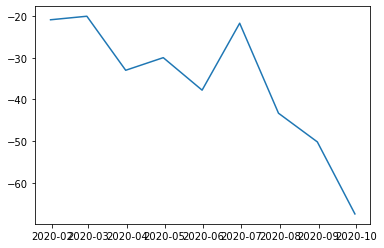

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#DATA GENERATION BLOCK
a = 10*np.random.standard_normal((9, 4))
df = pd.DataFrame(a)
df.columns = ['No1', 'No2', 'No3', 'No4']
dates = pd.date_range('2020-1-1', periods=9, freq='M')
df.index = dates
#BASIC ANALYTICS
print(np.sqrt(abs(df)))
print(np.sqrt(abs(df)).sum())
plt.plot(df['No1'].cumsum())


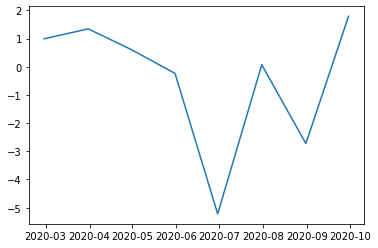

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#DATA GENERATION BLOCK
a = 10*np.random.standard_normal((9, 4))
df = pd.DataFrame(a)
df.columns = ['No1', 'No2', 'No3', 'No4']
dates = pd.date_range('2020-1-1', periods=9, freq='M')
df.index = dates

#Calculate returns for No1 time series
# shift这里是将数值整体往前错位一天/日期单位
ret_No1 = df['No1']/df['No1'].shift(1)

#第一个位置的数值会变为空 drop掉
ret_No1.dropna(inplace=True)
plt.plot(ret_No1)


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#DATA GENERATION BLOCK
a = 100*np.random.standard_normal((100, 2))
df = pd.DataFrame(a)
df.columns = ['No1', 'No2']
#Calculate polynomial regression
xdat = df['No1']
ydat = df['No2']
slope, intercept, r_value, p_value, std_err = stats.linregress(xdat,ydat)
print("r-squared:", r_value**2)


r-squared: 1.1425153959555486e-06


In [16]:
p_value

0.9915789098605945

In [17]:
intercept

-0.07339132687505776

4.2 Linear Regression

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [20]:
df = pd.read_csv('Boston.csv')

In [21]:
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [22]:
df.drop(columns=['Unnamed: 0'])


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [23]:
# 定义function 输出Linear regression的图像
def lin_regplot(X, y, model):
    #输出点状图
    plt.scatter(X, y, c='lightblue')
    #输出拟合曲线
    plt.plot(X, model.predict(X), color='r', linewidth=2)
    return

In [24]:
X = df[['rm']].values
y = df[['medv']].values

In [25]:
#调用LinearRegression包
slr = LinearRegression()
#使用之前定义的XY输入输出变量来fit模型
slr.fit(X,y)
#预计输出值y_pred
y_pred = slr.predict(X)

print('ML scopeL %.3f' % slr.coef_[0])
print('ML intercept %.3f' % slr.intercept_)

ML scopeL 9.102
ML intercept -34.671


Text(0, 0.5, 'ML price')

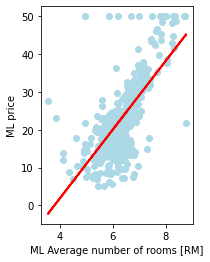

In [26]:
plt.figure(1)
x = []
plt.subplot(121)
lin_regplot(X,y,slr)
plt.xlabel('ML Average number of rooms [RM]')
plt.ylabel('ML price')

In [27]:
from sklearn.linear_model import RANSACRegressor

In [32]:
ransac = RANSACRegressor(LinearRegression(),
                        max_trials =1000,
                        min_samples = 50,
                        residual_threshold = 15,
                        random_state = 0)

In [33]:
#将XY值赋予模型
ransac.fit(X, y)

#检测线上以及线下的点
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)


In [34]:
line_X = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

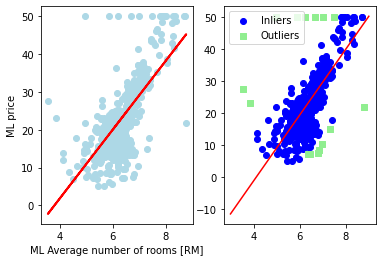

In [35]:
plt.figure(1)
x = []
plt.subplot(121)
lin_regplot(X,y,slr)
plt.xlabel('ML Average number of rooms [RM]')
plt.ylabel('ML price')


plt.subplot(122)
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue',
           marker = 'o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='lightgreen',
           marker = 's', label='Outliers')
plt.plot(line_X, line_y_ransac, color='r')
plt.legend(loc='upper left')

plt.show()